<a href="https://colab.research.google.com/github/Gerundio98/Cedula.Desarrollo-de-Software-II/blob/main/Notebook_Bloque_2_(Completado)_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al Aprendizaje Automático.**
### **Bloque 2 -** *Redes Neuronales Artificiales*

---
*Consejos de uso de Google Colab:*

*   Puedes consultar la documentación sobre una función escribiendo **?** justo después de una función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*


## 📈 **Regresión con Redes Neuronales Artificiales**

<p align="justify">Tras varios ejercicios trabajando con los modelos clásicos que la librería Sklearn nos ofrece, hoy vamos a avanzar en el mundo del aprendizaje automático en su vertiente más moderna: <b>El Aprendizaje Profundo</b> (a.k.a <i>Deep Learning</i>)

<p align="justify">Para ello vamos a retomar dos de los ejercicios practicados, uno de regresión y uno de clasificación, para aprender cómo podemos diseñar y entrenar redes neuronales sencillas que nos resuelvan la tarea, con <b>Sklearn</b> y con <b>Keras</b>. Con Sklearn podremos diseñar redes más sencillas que nos resuelvan la tarea rápidamente. Por el contrario, con Keras tendremos mayor flexibilidad y potencia para diseñar redes neuronales más avanzadas. ¡Vamos a verlo!

<p align="justify">Para ello, lo primero que tendremos que hacer será cargar nuevamente los datos:

In [ ]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

# Volvemos a cargar el Boston Housing Dataset.
from sklearn.datasets import fetch_openml
boston_dataset = fetch_openml(name='boston', version=1)

# y generamos las variables de entrada y salida, X e Y.
X = boston_dataset.data
Y = boston_dataset.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<p align="justify">Además, para aprovechar las técnicas de Análisis Exploratorio de Datos vistas en bloques anteriores, vamos a cargar los datos  en un DataFrame de Pandas para, en combinación con Seaborn, visualizarlos mejor.

In [ ]:
import pandas as pd

# Creamos un DataFrame de Pandas con todos nuestros datos.
data = pd.DataFrame(X, columns=boston_dataset.feature_names)

# Añadimos a la tabla también la columna de salida Y.
data["MDEV"] = Y

# Visualizamos el contenido de la tabla.
display(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<p align="justify">Por ejemplo, podemos preguntarnos <b>¿Qué tan correlacionadas están nuestras variables?</b> Para averiguar esto, vamos a visualizar la matriz de correlación de las variables de entrada.

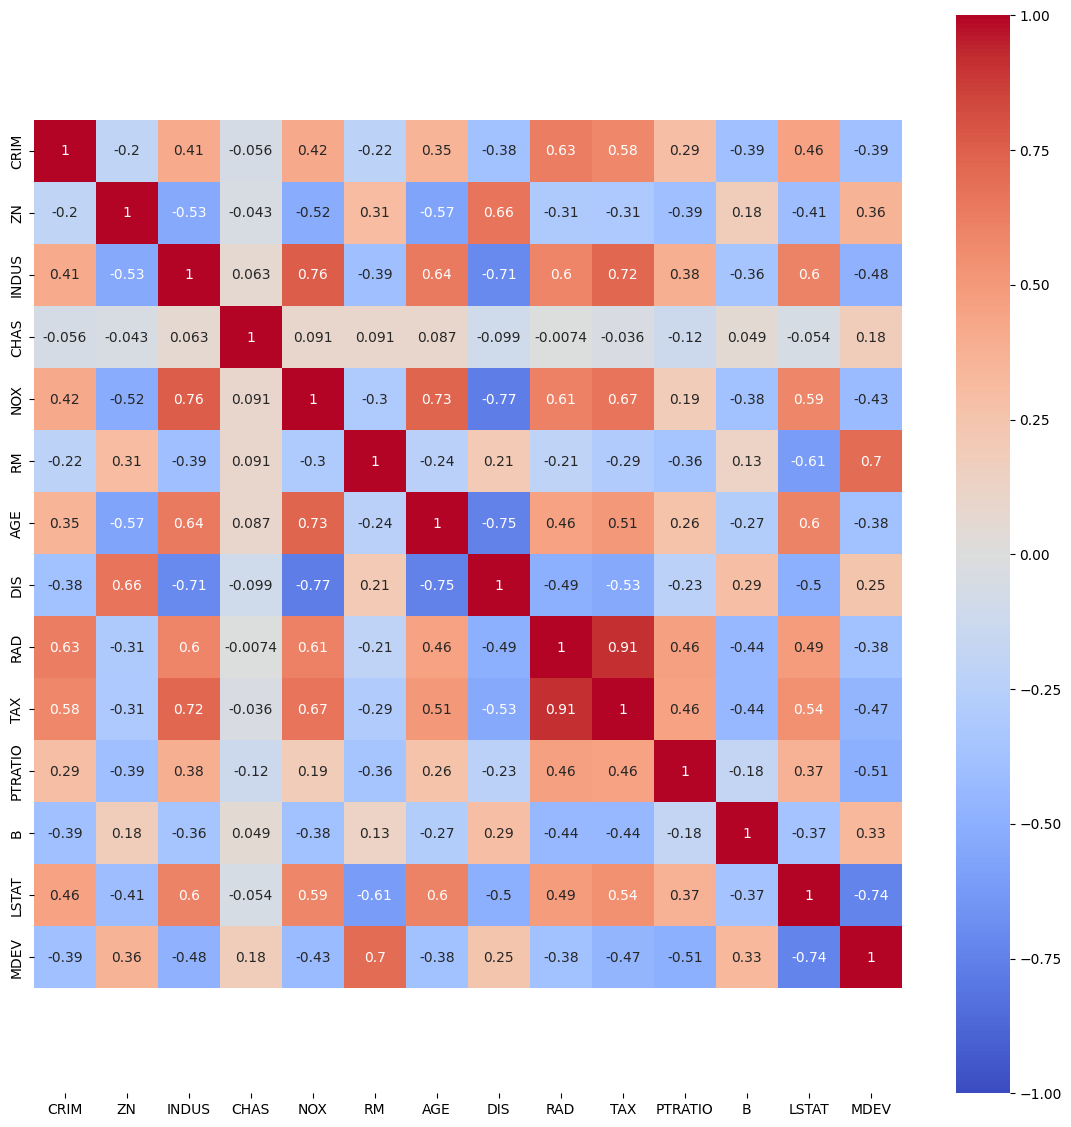

In [ ]:
import seaborn as sb

# Visualizamos el mapa de calor de la matriz de correlación.
plt.figure(figsize=(14, 14))
sb.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.axis("equal")
plt.show()

<p align="justify">Otra pregunta que podemos responder es <b>¿Se distribuyen en el mismo rango nuestras variables?</b> Para descubrir esto, vamos a visualizar un <i>Boxplot</i> que nos muestre cuál es el rango de distribución de cada una de las variables de nuestra tabla.

<Axes: >

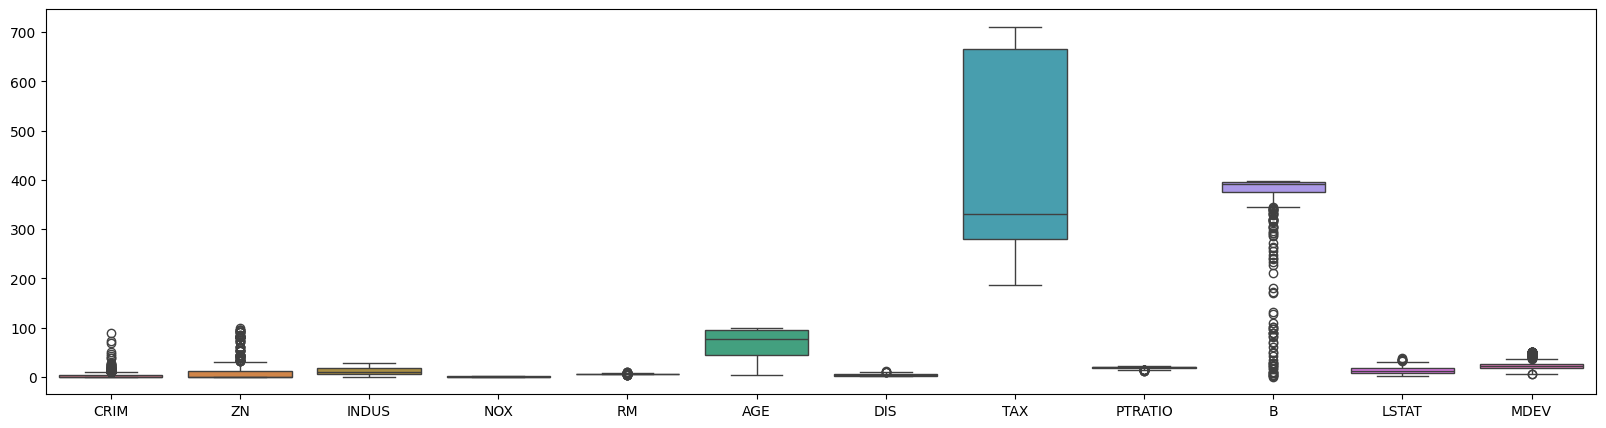

In [ ]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=data)

<p align="justify">Como se puede ver, el rango de distribución de las variables difiere bastante, donde variables como <b>TAX</b> dominan sobre el resto, indicándonos esto la necesidad de <b>escalar/normalizar</b> a nuestros datos. Podemos reescalar nuestras variables de forma sencilla con el método <i>MinMaxScaler(...)</i> de Sklearn.

In [ ]:
from sklearn.preprocessing   import MinMaxScaler

# Reescalamos las variables de entrada.
Xs = MinMaxScaler().fit_transform(X)
# y también la variable de salida.
Ys = MinMaxScaler().fit_transform(Y.values[:, np.newaxis])[:,0]

<p align="justify">Una vez tenemos nuestros datos listos, podemos proceder a modelizar los datos. Para comparar el rendimiento de las Redes Neuronales con los modelos vistos anteriormente, vamos a trabajar primero con el modelo de <b>Regresión Lineal Múltiple</b>, aplicando en esta ocasión buenas prácticas, como por ejemplo la de generar particiones de <i>train</i> y <i>test</i>.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error

# Generamos las particiones de entrenamiento y prueba.
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys)

# Instanciamos al modelo de Regresión Lineal.
model = LinearRegression()

# Y lo entrenamos con nuestros datos de entrenamiento.
model.fit(X_train, Y_train)

# Una vez entrenado, evaluamos la calidad del modelo calculando
# el Error Cuadrático Medio y el Coeficiente de Determinación R2.

print('-- Linear Regression --')

print('VAL LOSS:', mean_squared_error(model.predict(X_test), Y_test))
print('R2 SCORE:',model.score(X_test, Y_test))

-- Linear Regression --
VAL LOSS: 0.009748609635036256
R2 SCORE: 0.6974167969788362


<p align="justify">Una vez entrenado el modelo de <b>Regresión Lineal Múltiple</b>, al evaluarlo obtenemos un $R^2$ de ≈0.68. Ahora vamos a probar a entrenar a una <b>Red Neuronal Artificial</b> con </b>Sklearn</b>. Esto es bastante sencillo, pues trabajar con este modelo es casi idéntico a cómo hemos trabajado con los modelos previos. En este caso, vamos a entrenar al único tipo de red neuronal que Sklearn nos ofrece: un <b>Multilayer Perceptron</b> <i>(MLP)</i>. Este tipo de red representa a la arquitectura estándar de red neuronal, que por lo general puede ser aplicada a cualquier tipo de problema.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Creamos una red MLPRegressor y la configuramos
# al gusto de nuestras necesidades.
model = MLPRegressor(activation='relu')

# La entrenamos con la participación de entrenamiento.
model.fit(X_train, Y_train)

# Y una vez entrenada evaluamos su rendimiento.
print('-- Neural Network --')
print('VAL LOSS:', mean_squared_error(Y_test, model.predict(X_test)))
print('R2 SCORE:', model.score(X_test, Y_test))

-- Neural Network --
VAL LOSS: 0.00760717755012319
R2 SCORE: 0.7638838526476289


<p align="justify">Así de simple es entrenar a una Red Neuronal con Sklearn. Pero... <b>¿Y si quisieramos tener un mayor control en el diseño de estas redes?</b> Si lo que queremos es poder diseñar redes neuronales más avanzadas, y que además se vean beneficiadas en su entrenamiento de la aceleración por hardware (e.g. <i>GPUs</i>), entonces tendremos que trabajar con otras librerías, como <b>Tensorflow</b> o <b>Pytorch</b>.

<p align="justify">En nuestro caso vamos a trabajar con <b>Tensorflow</b>, y en concreto con su módulo de <b>Keras</b>, que nos permitirá tener un acercamiento a esta librería mucho más amable, a través de métodos y funciones que en muy pocas líneas de código nos permitirán poner a funcionar a nuestras redes.

<p align="justify">Una red neuronal implementada en Keras, consta de 3 partes:

- <b>Fase de diseño:</b> Aquí podremos definir la arquitectura de la red.<i> Cuántas capas tendrá; cuántas neuronas tendrá cada capa; qué funciones de activación utilizarán; etc.</i>
- <b>Fase de compilación:</b> Aquí diremos a Keras que la red ya está diseñada, y ahora, cómo queremos configurarla de cara al entrenamiento. <i>Qué optimizador vamos a utilizar; qué tipo de función de error; qué métricas queremos visualizar, etc.</i>
- <b>Fase de entrenamiento:</b> Por último, en esta fase introduciremos los datos de entrenamiento y configuraremos cómo será este proceso.<i> Cuántas épocas se va a entrenar; cuáles son los datos de validación; etc</i>

<p align="justify">Vamos a ver cómo podemos hacer el diseño de una Red Neuronal con Keras para este ejercicio de regresión.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

# FASE DE DISEÑO - Para iniciar la creación de nuestro modelo
# tenemos que crear un objeto Sequential() que nos servirá para
# definir qué secuencia de capas tendrá nuestra red neuronal.
model = Sequential()

# Una vez creado, podremos ir añadiendo diferentes tipos de capas
# a nuestra red. Nosotros de momento añadiremos capas Dense(...)
# que implementan capas de neuronas donde todas están conectadas
# con las neuronas de la capa anterior (existen otro tipos de capas).
# El número de neuronas se suele elegir de forma que vaya decrementando
# desde el número inicial de variables, hasta el número que tendremos
# al final. Para este problema, dos capas con 10 y 5 neuronas es suficiente.
model.add(Dense(10, activation="relu"))
model.add(Dense( 5, activation="relu"))

# La última capa deberá de estar configurada para que el valor que genere
# coincida con el formato de nuestra variable de salida. En este caso
# sabemos que vamos a generar un único valor, de ahí el poner 1 sola neurona.
# También, sabemos que los valores de Y están reescalados al rango de 0-1,
# y es por eso que podemos usar la función de activación Sigmoid, que ya
# sabemos que sólo genera valores entre 0 y 1.
model.add(Dense( 1, activation="sigmoid"))

<p align="justify">Diseñar una red neuronal <b>no es una ciencia exacta</b>, y es por ello que en muchos casos no existen pautas definidas para saber cuántas capas o neuronas elegir. Pero orientativamente, el diseño suele tener en cuenta esto:

- <p align="justify">El número de neuronas decrementa desde el Input al Output. Si tenemos 13 variables de entrada y 1 de salida, las capas intermedias irán decrementando proporcionalmente el número de neuronas.

- <p align="justify">El número de capas va en función de la complejidad del problema y la cantidad de datos con los que contamos. Añadir capas en exceso, significa añadir más parámetros y por tanto correr el riesgo de mayor presencia de <i>Overfitting</i>.

- <p align="justify">La función de activación <i>ReLU</i> para las capas intermedias es la mejor opción de forma general. Favorece un entrenamiento más rápido.

- <p align="justify">La última capa deberá de estar configurada para que los valores que genere se aproximen al formato de nuestras variables de salida. Como en este caso sabemos que generamos un sólo valor cuyo rango va de 0 a 1, podemos configurarla con una única neurona y una función de activación <i>Sigmoid</i>.

In [ ]:
# FASE DE COMPILACIÓN - En este punto podemos elegir el algoritmo de optimización
# a utilizar durante el entrenamiento y su Ratio de Aprendizaje. También la métrica
# a optimizar, que en este caso será el Error Cuadrático Medio (MSE)

model.compile(optimizer=Adam(learning_rate=0.005), loss="mse")

# FASE DE ENTRENAMIENTO - Aquí suministramos los datos de entrada y salida a nuestro
# modelo, tanto en su partición de entrenamiento como de validación.
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 12ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0058
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0063
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0060
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0067
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0062
Epoch 11

In [ ]:
from sklearn.metrics import r2_score

print('-- Neural Network (KERAS)--')
print('VAL LOSS:', mean_squared_error(Y_test, model.predict(X_test)))
print('R2 SCORE:',           r2_score(Y_test, model.predict(X_test)))

-- Neural Network (KERAS)--
4/4 [==============================] - 0s 3ms/step
VAL LOSS: 0.006420896417833189
4/4 [==============================] - 0s 3ms/step
R2 SCORE: 0.8007043591742037


<p align="justify">Así vemos que en muy pocas líneas de código hemos podido diseñar y entrenar a una red neuronal cuyo rendimiento parece superar al que hemos obtenido antes con Sklearn, con un $R^2$ de 0.82.

## **Clasificación con Redes Neuronales Artificiales**

<p align="justify">Ya hemos visto cómo podemos diseñar redes neuronales para resolver un problema de regresión. Ahora vamos a ver cómo podemos hacer el mismo diseño pero para la resolución de un problema de clasificación. Ahora verás que no hay muchas diferencias. En esta ocasión, el dataset elegido será el de las botellas de vino.

In [ ]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

# Cargamos los datos.
wine_data = load_wine()

# Generamos las variables de entrada y salida.
X = wine_data.data
Y = wine_data.target

# Creamos un DataFrame de Pandas con todos nuestros datos.
data = pd.DataFrame(X, columns=wine_data.feature_names)

# Añadimos a la tabla también la columna de salida Y.
data["wine_type"] = Y

# Visualizamos el contenido de la tabla.
display(data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<Axes: >

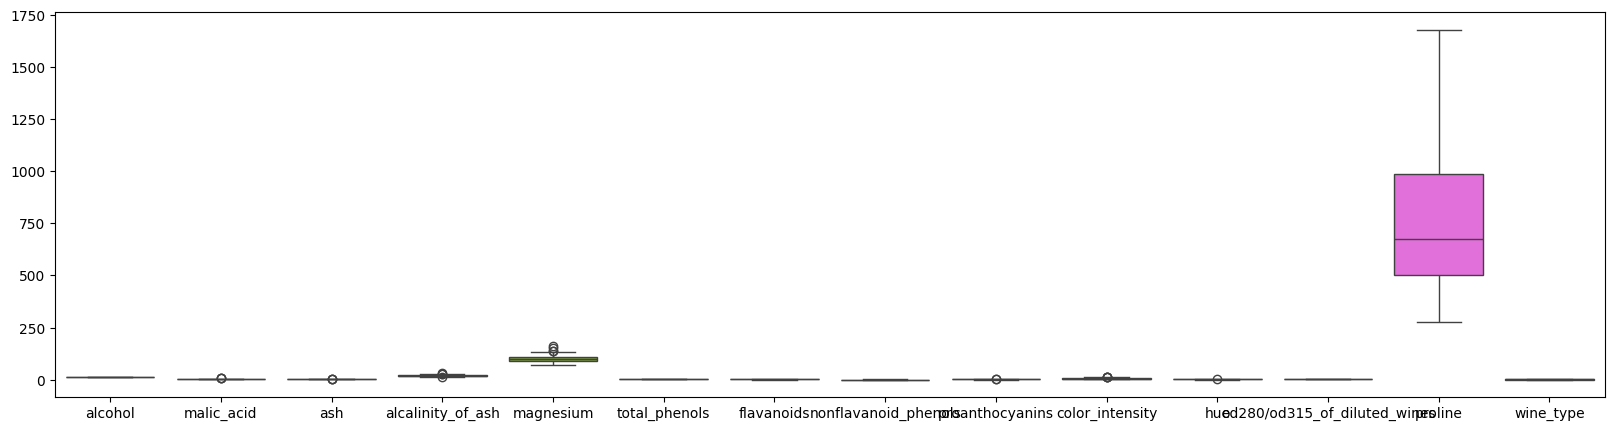

In [ ]:
# Visualizamos con un Boxplot la escala de las variables.
plt.figure(figsize=(20, 5))
sb.boxplot(data=data)

<p align="justify">Veamos ahora cómo es el diseño de la red neuronal para el problema de clasificación. Una primera diferencia obvia, es que ahora no vamos a reescalar la variable de salida, puesto que en esta ocasión se trata de una variable categórica. Lo que sí tenemos que modificar es su codificación, para que en vez de venir representada por una etiqueta numérica se codifique con vectores tipo <b>One-Hot Encoding</b>. Esto se puede conseguir de forma muy sencilla con el método <i>to_categorical(...)</i> de Keras.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import MinMaxScaler
from tensorflow.keras.utils  import to_categorical

# Escalamos las variables de entrada.
Xs = MinMaxScaler().fit_transform(X)
# Codificamos a One-Hot Encoding la salida.
Ye = to_categorical(Y)

# Visualizamos el output codificado con One-Hot Encoding.
print("-- Codificación One-Hot Encoding --\n\n", Ye[np.random.choice(178, 5)])

# Particionamos los datos en datos de entrenamiento y test.
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ye)

-- Codificación One-Hot Encoding --

 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
# Generamos al modelo.
model = Sequential()

# Añadimos las capas intermedias.
model.add(Dense(10, activation="relu"))
model.add(Dense( 4, activation="relu"))

# La última capa ahora tendrá que estar configurada para generar vectores de 3
# componentes que se aproximen al formato de One-Hot Encoding. Es por ello que
# definimos 3 neuronas, y una función de activación Softmax, cuyas propiedades
# son la de generar vectores de valores entre 0 y 1, y donde además todas las
# componentes suman 1 (son vectores de probabilidad).
model.add(Dense( 3, activation="softmax"))

# Una vez está la red diseñada, configuramos al optimizador. En este caso la
# única diferencia que añado es la de visualizar la métrica Accuracy durante
# el entrenamiento, que en el contexto del problema de clasificación es más
# informativa que el Error Cuadrático Medio (MSE).
model.compile(optimizer=Adam(learning_rate=0.005), loss="mse", metrics=["acc"])

# Y comenzamos el entrenamiento de la red neuronal.
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 224ms/step - loss: 0.2068 - acc: 0.4737 - val_loss: 0.2058 - val_acc: 0.5333
Epoch 2/100
5/5 [==============================] - 0s 39ms/step - loss: 0.1991 - acc: 0.5414 - val_loss: 0.2007 - val_acc: 0.5556
Epoch 3/100
5/5 [==============================] - 0s 48ms/step - loss: 0.1925 - acc: 0.6241 - val_loss: 0.1974 - val_acc: 0.6000
Epoch 4/100
5/5 [==============================] - 0s 39ms/step - loss: 0.1864 - acc: 0.6541 - val_loss: 0.1920 - val_acc: 0.6000
Epoch 5/100
5/5 [==============================] - 0s 37ms/step - loss: 0.1806 - acc: 0.6466 - val_loss: 0.1855 - val_acc: 0.6000
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1744 - acc: 0.6842 - val_loss: 0.1808 - val_acc: 0.6444
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1684 - acc: 0.6842 - val_loss: 0.1737 - val_acc: 0.6444
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1613 - acc: 0.6

Rápidamente vemos que el modelo es capaz de alcanzar una tasa de acierto del 100% sobre los datos de validación. De esta manera comprobamos qué tan sencillo es diseñar y entrenar redes neuronales funcionales con Keras.

# **Actividad Evaluable 2.** Redes Neuronales Artificiales.

<img src="https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp" width=600px>

<p align="justify">Uno de los datasets más trabajados dentro del mundo de las Redes Neuronales es el <b>MNIST</b>. Un dataset conformado por imágenes de <i>28x28</i> píxeles de números escritos a mano y digitalizados, que ahora deberemos de aprender a clasificar <i>(similar al trabajo del Bloque 5)</i>. Hoy nuestra misión será aplicar el conocimiento aprendido en el diseño de Redes Neuronales con <b>Keras</b> para entrenar a nuestro clasificador.

---

**Tu tarea:** Completa las siguientes tareas de análisis aplicadas sobre el dataset MNIST:

1. <p align="justify">Preprocesa las variables de entrada para que su rango de valores del input esté escalado a 0-1, y para que las variables de salida estén codificadas a vectores <i>One-Hot Encoding</i>. También modifica las dimensiones de las variables de entrada para que las imágenes con dimensiones <i>(n_img, 28, 28),</i> queden representadas en forma de tabla con dimensiones <i>(n_img, 784)</i>.

2. <p align="justify">Diseña y entrena a una Red Neuronal con Keras que sea capaz de clasificar estas imágenes con una <b>tasa de acierto superior al 90%.</b>

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3842 - accuracy: 0.8912 - val_loss: 0.1875 - val_accuracy: 0.9462
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1525 - accuracy: 0.9539 - val_loss: 0.1378 - val_accuracy: 0.9586
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1069 - accuracy: 0.9683 - val_loss: 0.1269 - val_accuracy: 0.9625
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.1056 - val_accuracy: 0.9687
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.1020 - val_accuracy: 0.9700
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.0891 - val_accuracy: 0.9730
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.0938 - val_accuracy: 0.9714
Epoch 

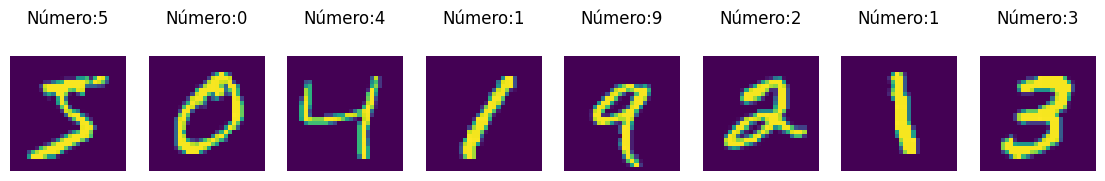

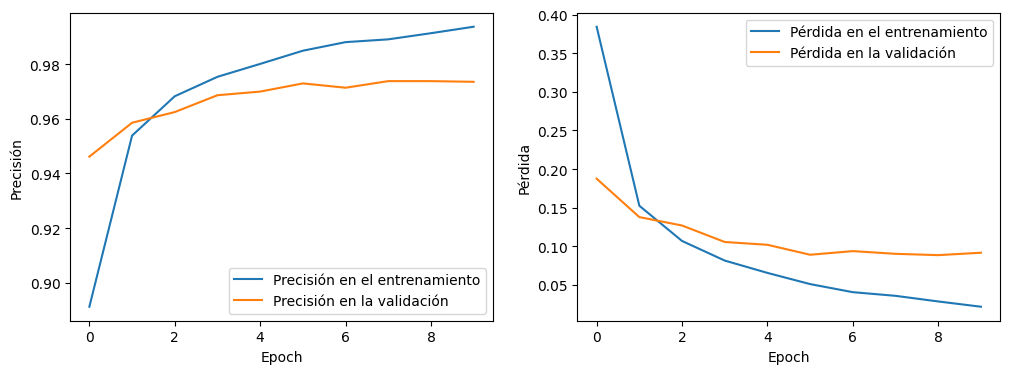

In [14]:
from tensorflow.keras.datasets import mnist

# Cargamos el dataset MNIST desde la librería de Keras.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Visualizamos alguno de los números del dataset.
fig, axs = plt.subplots(1, 8, figsize=(14, 2))
for i in range(len(axs)):
  axs[i].matshow(X_train[i])                     # Visualiza el número.
  axs[i].set_title('Número:' + str(Y_train[i]))  # Añade un título descriptivo.
  axs[i].axis('off')                             # Oculta los ejes de la gráfica.


# COMIENZA AQUÍ TU CÓDIGO

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Preprocesamiento de los datos
# Escalar los valores de las imágenes a 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar las imágenes de (n_img, 28, 28) a (n_img, 784)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# Convertir las etiquetas a One-Hot Encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Diseño de la red neuronal
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilación del modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Gráfica de precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en el entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en la validación')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
